# Libraries and Data

In [15]:
# import Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

### Kmean

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm

#### Display jupyter
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
"""
Created on Tue Aug 13 14:57:42 2019
@author: pkostako
"""

#import urllib.request

#url = 'http://apps.start.umd.edu/gtd/downloads/dataset/globalterrorismdb_0718dist.xlsx'
#urllib.request.urlretrieve(url, "terror.xlsx")
df = pd.read_excel("terror.xlsx")
df.to_csv("./data.csv", sep=",")
#df = pd.read_csv('data.csv')

'\nCreated on Tue Aug 13 14:57:42 2019\n@author: pkostako\n'

# Clustering Countries based on successful and unsuccessful

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=1, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=2, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=3, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=4, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=5, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=6, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=7, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=8, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=9, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=10, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'Elbow method based on success feature')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'WCSS')

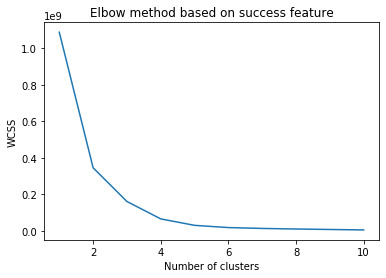

In [16]:
#Create a two way table #Country.name, #Success

# ratio - variable
country_success = pd.crosstab(df.country_txt, df.success)

X = country_success.iloc[:, [0,1]].values

#Find out the optimal number of clasters using the elbow method
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss= []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 10000, n_init = 100, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("Elbow method based on success feature")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

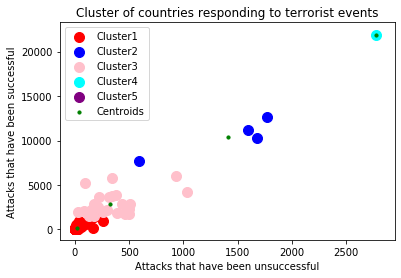

In [123]:
#Apply kmeans to the Ratio dataset. 

kmeans= KMeans(n_clusters = 4, init = 'k-means++', max_iter = 100000, n_init = 10, random_state = 1000)
y_kmeans = kmeans.fit_predict(X)

#Viz the clusters

plt.scatter(X[y_kmeans== 0, 0], X[y_kmeans== 0, 1], s =100, c= 'red', label = "Cluster1")
plt.scatter(X[y_kmeans== 1, 0], X[y_kmeans== 1, 1], s = 100, c= 'blue', label = "Cluster2")
plt.scatter(X[y_kmeans== 2, 0], X[y_kmeans== 2, 1], s = 100, c= 'pink', label = "Cluster3")
plt.scatter(X[y_kmeans== 3, 0], X[y_kmeans== 3, 1], s = 100, c= 'cyan', label = "Cluster4")
plt.scatter(X[y_kmeans== 4, 0], X[y_kmeans== 4, 1], s = 100, c= 'purple', label = "Cluster5")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s=10, c = 'green', label = 'Centroids')
plt.title ('Cluster of countries responding to terrorist events')
plt.xlabel('Attacks that have been unsuccessful')
plt.ylabel("Attacks that have been successful")
plt.legend()
plt.show()

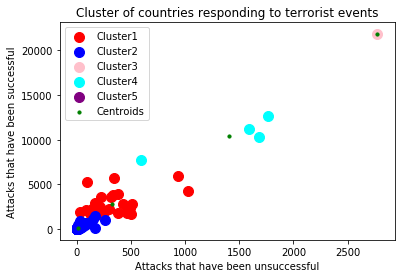

In [122]:
#Apply Hierarchy to the Ratio dataset. 

kmeans= KMeans(n_clusters = 4, init = 'k-means++', max_iter = 100000, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

#Viz the clusters

plt.scatter(X[y_kmeans== 0, 0], X[y_kmeans== 0, 1], s =100, c= 'red', label = "Cluster1")
plt.scatter(X[y_kmeans== 1, 0], X[y_kmeans== 1, 1], s = 100, c= 'blue', label = "Cluster2")
plt.scatter(X[y_kmeans== 2, 0], X[y_kmeans== 2, 1], s = 100, c= 'pink', label = "Cluster3")
plt.scatter(X[y_kmeans== 3, 0], X[y_kmeans== 3, 1], s = 100, c= 'cyan', label = "Cluster4")
plt.scatter(X[y_kmeans== 4, 0], X[y_kmeans== 4, 1], s = 100, c= 'purple', label = "Cluster5")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s=10, c = 'green', label = 'Centroids')
plt.title ('Cluster of countries responding to terrorist events')
plt.xlabel('Attacks that have been unsuccessful')
plt.ylabel("Attacks that have been successful")
plt.legend()
plt.show()

# Clustering Countries based on the number of incidents and ratio of successful

In [4]:

country_success = pd.crosstab(df.country_txt, df.success)
X = country_success.iloc[:, [0,1]].values
noIncidents = np.sum(X,axis=1).tolist()
#print (country_success.values[0][:])

print (country_success)

ratioIncident = []
for i in X:
    if i[0]==0 or i[1] == 0 :
        ratio_temp = 0
    elif i[1] > i[0]:
        ratio_temp = i[1] / i[0]
    elif i[1] < i[0]:
        ratio_temp = i[0] / i[1]
    ratioIncident.append(round(ratio_temp, 3))

#print (ratioIncident)

ratio_no = np.column_stack((ratioIncident, noIncidents))

#print (ratio_no)

#print (X[:, 0])

#country_NoIncident_Ratio = (country_success.index, X[:, 0], X[:, 1], ratioIncident, noIncidents)

"""
country_NoIncident_Ratio = [country_success.index,X.]

# index is the name of countries
for index, eachRow in country_success.iterrows():
    print (index)
"""

success                              0      1
country_txt                                  
Afghanistan                       1590  11141
Albania                             16     64
Algeria                            182   2561
Andorra                              0      1
Angola                              13    486
Antigua and Barbuda                  0      1
Argentina                          101    714
Armenia                              4     20
Australia                           17     97
Austria                             27     88
Azerbaijan                           5     44
Bahamas                              1      4
Bahrain                             28    179
Bangladesh                         129   1519
Barbados                             0      3
Belarus                              0     13
Belgium                             29    125
Belize                               1      7
Benin                                0      8
Bhutan                            

'\ncountry_NoIncident_Ratio = [country_success.index,X.]\n\n# index is the name of countries\nfor index, eachRow in country_success.iterrows():\n    print (index)\n'

In [5]:
#Find out the optimal number of clasters using the elbow method
from sklearn.preprocessing import Normalizer

ratio_no_transformer = Normalizer().fit(ratio_no) 
ratio_no_transformer = ratio_no_transformer.transform(X)

wcss_2= []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 10000, n_init = 100, random_state = 0)
    kmeans.fit(ratio_no)
    wcss_2.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title("Elbow method for number and ratio attacks")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=1, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=2, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=3, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=4, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=5, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=6, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=7, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=8, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=9, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=10, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

NameError: name 'wcss' is not defined

Text(0.5, 1.0, 'Cluster of countries responding to terrorist events (Normalization)')

Text(0.5, 0, 'The ratio between successful and unsuccesful incidents')

Text(0, 0.5, 'The number of incidents')

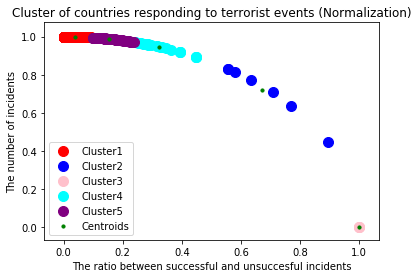

In [6]:
#Apply kmeans to the Ratio dataset. 

from sklearn.preprocessing import Normalizer

ratio_no_transformer = Normalizer().fit(ratio_no) 
ratio_no_transformer = ratio_no_transformer.transform(X)

kmeans= KMeans(n_clusters = 5, init = 'k-means++', max_iter = 100000, n_init = 10, random_state = 5)
y_kmeans2 = kmeans.fit_predict(ratio_no_transformer)

#Viz the clusters

#plt.scatter(ratio_no[y_kmeans2== 0, 0], ratio_no[y_kmeans2== 0, 1], s = 100, c= 'red', label = "Cluster1")
#plt.scatter(ratio_no[y_kmeans2== 1, 0], ratio_no[y_kmeans2== 1, 1], s = 100, c= 'blue', label = "Cluster2")
#plt.scatter(ratio_no[y_kmeans2== 2, 0], ratio_no[y_kmeans2== 2, 1], s = 100, c= 'pink', label = "Cluster3")
#plt.scatter(ratio_no[y_kmeans2== 3, 0], ratio_no[y_kmeans2== 3, 1], s = 100, c= 'cyan', label = "Cluster4")
#plt.scatter(ratio_no[y_kmeans2== 4, 0], ratio_no[y_kmeans2== 4, 1], s = 100, c= 'purple', label = "Cluster5")
#plt.scatter(ratio_no[y_kmeans2== 5, 0], ratio_no[y_kmeans2== 5, 1], s = 100, c= 'lightblue', label = "Cluster5")

plt.scatter(ratio_no_transformer[y_kmeans2== 0, 0], ratio_no_transformer[y_kmeans2== 0, 1], s = 100, c= 'red', label = "Cluster1")
plt.scatter(ratio_no_transformer[y_kmeans2== 1, 0], ratio_no_transformer[y_kmeans2== 1, 1], s = 100, c= 'blue', label = "Cluster2")
plt.scatter(ratio_no_transformer[y_kmeans2== 2, 0], ratio_no_transformer[y_kmeans2== 2, 1], s = 100, c= 'pink', label = "Cluster3")
plt.scatter(ratio_no_transformer[y_kmeans2== 3, 0], ratio_no_transformer[y_kmeans2== 3, 1], s = 100, c= 'cyan', label = "Cluster4")
plt.scatter(ratio_no_transformer[y_kmeans2== 4, 0], ratio_no_transformer[y_kmeans2== 4, 1], s = 100, c= 'purple', label = "Cluster5")
#plt.scatter(ratio_no[y_kmeans2== 5, 0], ratio_no[y_kmeans2== 5, 1], s = 100, c= 'lightblue', label = "Cluster5")


plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s=10, c = 'green', label = 'Centroids')
plt.title ('Cluster of countries responding to terrorist events (Normalization)')
plt.xlabel('The ratio between successful and unsuccesful incidents')
plt.ylabel("The number of incidents")
plt.legend()
plt.show()

In [7]:
# prepare the country_index
country_countryTXT = pd.DataFrame(data=np.column_stack((df.country, df.country_txt)), columns =['country', 'country_txt'])
country_countryTXT = country_countryTXT.drop_duplicates()

# sort countries based on country_txt
country_countryTXT = country_countryTXT.sort_values(by='country')
country_countryTXT = country_countryTXT.reset_index(drop=True)

# add cluster for countries
country_countryTXT['cluster'] = y_kmeans2

# drop columns txt
country_countryTXT= country_countryTXT.drop(columns='country_txt')

# merge two dataframe together
df_cluster = pd.merge(df, country_countryTXT, how='inner', on = 'country')
#for index, eachRow in df.iterrows():
#    for indexCountry, eachCountry in bcountry_countryTXT.iterrows():
        
#        if eachRow['country'] == eachCountry['country']:
#            #print (eachRow['cluster_country'], y_kmeans2[indexCountry],eachRow['country'] )
#            df['cluster_country'][index] = y_kmeans2[indexCountry]

df_cluster.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,cluster
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,3
1,197003240002,1970,3,24,NaN,1,1970-03-26,58,Dominican Republic,2,Central America & Caribbean,National,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,4,Military,34.0,"Military Personnel (soldiers, troops, officers...",U.S. Air force,"Lt. Col. Donal J. Crowley, U.S. Air attache",217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dominican Popular Movement (MPD),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,2.0,NaN,Dominican Republic,1.0,0.0,NaN,NaN,NaN,NaN,2.0,Hostage(s) released by perpetrators,1.0,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN,3
2,197101280001,1971,1,28,NaN,0,NaT,58,Dominican Republic,2,Central America & Caribbean,National,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,8,Educational Institution,49.0,School/University/Educational Building,NaN,High School,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tony El Pelou Band,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,2.0,Automatic or Semi-Automatic Rifle,5.0,Firearms,3.0,Handgun,5.0,Firearms,2.0,Automatic or Semi-Automatic Rifle,NaN,NaN,NaN,NaN,Automatic firearm; Pistols; Automatic firearms...,0.0,NaN,NaN,0.0,NaN,NaN,1,4.0,Unknown,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,3
3,197101280002,1971,1,28,NaN,0,NaT,58,Dominican Republic,2,Central America & Caribbean,National,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,NaN,Ra

In [32]:
# processing data remove txt values

df_cluster.dtypes

eventid                        int64
iyear                          int64
imonth                         int64
iday                           int64
approxdate                    object
extended                       int64
resolution            datetime64[ns]
country                       object
country_txt                   object
region                         int64
region_txt                    object
provstate                     object
city                          object
latitude                     float64
longitude                    float64
specificity                  float64
vicinity                       int64
location                      object
summary                       object
crit1                          int64
crit2                          int64
crit3                          int64
doubtterr                    float64
alternative                  float64
alternative_txt               object
multiple                     float64
success                        int64
s

In [8]:
# Sort based on cluster to separate to cluster
df_preprocess = df_cluster

# sort the dataframe
df_preprocess_sort = df_preprocess.sort_values(by='cluster')

# set the index to be this and don't drop
df_preprocess_sort.set_index(keys=['cluster'], drop=False,inplace=True)

# get a list of names
cluster_list = df_preprocess_sort['cluster'].unique().tolist()

df_preprocess_sort = df_preprocess_sort.fillna(-10)


# now we can perform a lookup on a 'view' of the dataframe
group_0 = df_preprocess_sort.loc[df_preprocess_sort.cluster==0]
group_1 = df_preprocess_sort.loc[df_preprocess_sort.cluster==1]
group_2 = df_preprocess_sort.loc[df_preprocess_sort.cluster==2]
group_3 = df_preprocess_sort.loc[df_preprocess_sort.cluster==3]
group_4 = df_preprocess_sort.loc[df_preprocess_sort.cluster==4]



In [128]:
# Cross-validation
from sklearn import tree
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import GridSearchCV


#selected_df['success'] = selected_df['success'].map({'nonSuccess':0,'Success':1})
feature_cols = ['iyear','imonth','iday','crit1','crit2','crit3','multiple', # 'resolution',
                  'country',#'region',#'city',
                'specificity',
                  'attacktype1','suicide',
                  'weaptype1','weapsubtype1',
                  'targtype1','targsubtype1',#'corp1','target1',
                'natlty1', 
                #'success', 
                  #'gname','gsubname',
                'guncertain1','individual','nperps','nperpcap','claimed','claimmode','compclaim',
                #'nkill','nkillter','nwound','nwoundte','property','propextent',
                  'INT_LOG','INT_IDEO','INT_MISC','INT_ANY']

feature_cols_ori = df_preprocess.columns

list_remove = ['provstate', 'city', 'summary', 'location', 'weapdetail',
               'corp1', 'target1',
               'corp2', 'target2',
               'corp3', 'target3',
               'motive',
               'approxdate', 'success',  'resolution',  'country_txt', 'region_txt', 'alternative_txt', 
               'attacktype1_txt', 'attacktype2_txt', 'attacktype3_txt', 
               'targtype1_txt','targsubtype1_txt', 'natlty1_txt',
               'targtype2_txt','targsubtype2_txt', 'natlty2_txt', 
               'targtype3_txt','targsubtype3_txt', 'natlty3_txt', 
               'gname', 'gsubname',
               'gname2', 'gsubname2', 'gname3', 'gsubname3', 
               'claimmode_txt', 'claimmode2_txt', 'claimmode3_txt',
               'weaptype1_txt', 'weapsubtype1_txt', 
               'weaptype2_txt', 'weapsubtype2_txt',
               'weaptype3_txt', 'weapsubtype3_txt', 
               'weaptype4_txt', 'weapsubtype4_txt', 
               'propextent_txt', 'hostkidoutcome_txt',
               'related', 'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource',
               'ransomnote', 'divert','kidhijcountry', 'propcomment',
               # extra-features
               'nkill','nkillter', 'nkillus',
               'nwound','nwoundte','nwoundus',
               'property','propextent',
              ]
feature_cols = []
for i in feature_cols_ori:
    if i in list_remove:
        continue
    else:
        feature_cols.append(i)
    
print (feature_cols)       
X = group_3[feature_cols] # Features
#y = selected_df.success # Target variable
y = group_3.success
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

tsetdf = pd.DataFrame(df_cluster,columns= feature_cols)
tsetdf.dtypes

['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country', 'region', 'latitude', 'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'multiple', 'suicide', 'attacktype1', 'attacktype2', 'attacktype3', 'targtype1', 'targsubtype1', 'natlty1', 'targtype2', 'targsubtype2', 'natlty2', 'targtype3', 'targsubtype3', 'natlty3', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claim2', 'claimmode2', 'claim3', 'claimmode3', 'compclaim', 'weaptype1', 'weapsubtype1', 'weaptype2', 'weapsubtype2', 'weaptype3', 'weapsubtype3', 'weaptype4', 'weapsubtype4', 'propvalue', 'ishostkid', 'nhostkid', 'nhostkidus', 'nhours', 'ndays', 'ransom', 'ransomamt', 'ransomamtus', 'ransompaid', 'ransompaidus', 'hostkidoutcome', 'nreleased', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY', 'cluster']


eventid             int64
iyear               int64
imonth              int64
iday                int64
extended            int64
country            object
region              int64
latitude          float64
longitude         float64
specificity       float64
vicinity            int64
crit1               int64
crit2               int64
crit3               int64
doubtterr         float64
alternative       float64
multiple          float64
suicide             int64
attacktype1         int64
attacktype2       float64
attacktype3       float64
targtype1           int64
targsubtype1      float64
natlty1           float64
targtype2         float64
targsubtype2      float64
natlty2           float64
targtype3         float64
targsubtype3      float64
natlty3           float64
guncertain1       float64
guncertain2       float64
guncertain3       float64
individual          int64
nperps            float64
nperpcap          float64
claimed           float64
claimmode         float64
claim2      

In [15]:
####### Random Forest ############

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
#param_grid = {
#    'bootstrap': [True],
#    'max_depth': [80, 90, 100, 110],
#    'max_features': [2, 3],
#    'min_samples_leaf': [3, 4, 5],
#    'min_samples_split': [8, 10, 12],
#    'n_estimators': [100, 200, 300, 1000]
#}

parameters_Forest={'min_samples_split' : range(2,20,2),'max_depth': range(3,20,1),'criterion': ['gini', 'entropy']}
# Create a based model
#rf = tree.RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = parameters_Forest, 
                          cv = 3, n_jobs = 4, verbose = 2)
grid_search.fit(X=X_train, y=y_train)

tree_model_forest = grid_search.best_estimator_
print (grid_search.best_score_, grid_search.best_params_) 

Fitting 3 folds for each of 306 candidates, totalling 918 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


TypeError: float() argument must be a string or a number, not 'NaTType'

/home/tringuyen/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

(array([0.75675676, 0.93194805]),
 array([0.39069767, 0.98517298]),
 array([0.51533742, 0.95782168]),
 array([ 645, 5463]))

[0.75675676 0.93194805] [0.39069767 0.98517298] [0.51533742 0.95782168] [ 645 5463]
#############
[[ 252  393]
 [  81 5382]]
#############


[[<matplotlib.axis.YTick at 0x7f3987f4a240>,
 [Text(0, 0, 'nonSuccess'), Text(0, 0, 'success')],
 Text(0, 0.5, 'True label'),
 [Text(0, 0, 'nonSuccess'), Text(0, 0, 'success')],
 Text(0.5, 0, 'Predicted label'),
 Text(0.5, 1.0, 'Decision Tree')]

Text(0, 0, '252')

Text(1, 0, '393')

Text(0, 1, '81')

Text(1, 1, '5382')

Text(0.5, 1.05, 'Confusion matrix of the classifier')

[Text(0, 1, ''), Text(0, 1, 'nonSuccess'), Text(0, 1, 'success')]

[Text(0, 0, ''), Text(0, 0, 'nonSuccess'), Text(0, 0, 'success')]

Text(0.5, 0, 'Predicted')

Text(0, 0.5, 'True')

Text(0, 0, '252')

Text(1, 0, '393')

Text(0, 1, '81')

Text(1, 1, '5382')

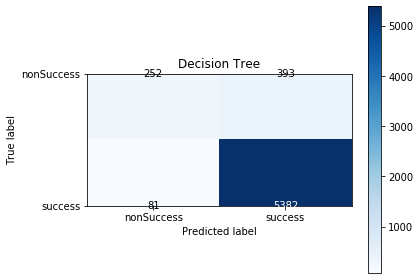

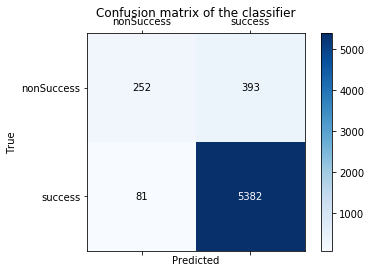

0.9223968565815324

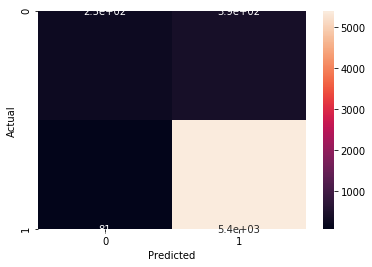

In [129]:
# draw the result with decision tree


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import matplotlib
import matplotlib.pyplot as plt

# set up the random forest
parameters_Forest_best ={'min_samples_split': 4, 'criterion': 'gini', 'max_depth': 19}
clf_forest_Final = RandomForestClassifier(min_samples_split= 4,  criterion= 'gini' )

# Train the random forest
clf_forest_Final.fit(X_train,y_train)

# Test the random forest
y_pred_forest = clf_forest_Final.predict(X_test)

# calculate the benchmark of the random forest
# confusion matrix
cm_forest = confusion_matrix(y_test, y_pred_forest)

# precision, recall and f_score
precision, recall, f_score, support = precision_recall_fscore_support(y_test, y_pred_forest.round())
precision_recall_fscore_support(y_test, y_pred_forest.round())  # per label

print (precision, recall, f_score, support)


labels = ['nonSuccess','success']


#plot_confusion_matrix(y_test, y_pred_forest.round(), labels, title='Confusion matrix, without normalization')

normalize = False

print ('#############')
print (cm_forest)
print ('#############')

fig, ax = plt.subplots()
im = ax.imshow(cm_forest, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm_forest.shape[1]),
       yticks=np.arange(cm_forest.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=['nonSuccess','success'], yticklabels=['nonSuccess','success'],
       title='Decision Tree',
       ylabel='True label',
       xlabel='Predicted label')

fmt = '.2f' if normalize else 'd'
thresh = cm_forest.max() / 2.
for i in range(cm_forest.shape[0]):
    for j in range(cm_forest.shape[1]):
        ax.text(j, i, format(cm_forest[i, j], fmt),
                ha="center", va="center",
                color="white" if cm_forest[i, j] > thresh else "black")
        
fig.tight_layout()
################################################
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm_forest, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')

for i in range(cm_forest.shape[0]):
    for j in range(cm_forest.shape[1]):
        ax.text(j, i, format(cm_forest[i, j], fmt),
                ha="center", va="center",
                color="white" if cm_forest[i, j] > thresh else "black")
        
plt.show()
################################################


#cm_df = pd.DataFrame(cm_forest,labels,labels)                      
#plt.figure()  
#sns.heatmap(cm_df, annot=True)
data = {'y_Predicted': y_pred_forest,
        'y_Actual':    y_test
        }

df_ = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_['y_Actual'], df_['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)

#fig.tight_layout()

metrics.accuracy_score(y_test, y_pred_forest.round())

In [130]:
# Get numerical feature importances
importances_Tree = list(clf_forest_Final.feature_importances_)

# List of tuples with variable and importance
feature_importances_Tree = [(feature, round(importance, 2)) for feature, importance in zip(feature_cols, importances_Tree)]

# Sort the feature importances by most important first
feature_importances_Tree = sorted(feature_importances_Tree, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
print (feature_importances_Tree)
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('targsubtype1', 0.1), ('eventid', 0.09), ('latitude', 0.08), ('longitude', 0.08), ('iday', 0.07), ('iyear', 0.06), ('targtype1', 0.06), ('imonth', 0.05), ('attacktype1', 0.05), ('weapsubtype1', 0.05), ('nperps', 0.03), ('weaptype1', 0.03), ('propvalue', 0.03), ('natlty1', 0.02), ('nperpcap', 0.02), ('country', 0.01), ('region', 0.01), ('specificity', 0.01), ('vicinity', 0.01), ('doubtterr', 0.01), ('alternative', 0.01), ('multiple', 0.01), ('guncertain1', 0.01), ('claimed', 0.01), ('claimmode', 0.01), ('weaptype2', 0.01), ('weapsubtype2', 0.01), ('ransom', 0.01), ('INT_LOG', 0.01), ('INT_IDEO', 0.01), ('INT_ANY', 0.01), ('extended', 0.0), ('crit1', 0.0), ('crit2', 0.0), ('crit3', 0.0), ('suicide', 0.0), ('attacktype2', 0.0), ('attacktype3', 0.0), ('targtype2', 0.0), ('targsubtype2', 0.0), ('natlty2', 0.0), ('targtype3', 0.0), ('targsubtype3', 0.0), ('natlty3', 0.0), ('guncertain2', 0.0), ('guncertain3', 0.0), ('individual', 0.0), ('claim2', 0.0), ('claimmode2', 0.0), ('claim3', 0.0),

In [135]:
# Visualization for the forest

import pydotplus
import six
from sklearn import tree

dotfile = six.StringIO()
i_tree = 0
for tree_in_forest in clf_forest_Final.estimators_:
    if i_tree <1:        
        tree.export_graphviz(tree_in_forest, out_file=dotfile)
        pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png('dtree'+ str(i_tree) +'.png')
        i_tree = i_tree + 1

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.50091 to fit



True

# Draft

In [135]:
print (y_kmeans2)

[1 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 3 0 0
 0 0 0 0 0 0 1 0 0 0 2 0 3 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 3 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 0 0 0 1 0 0 0 0 3 3 0 0 0 0 0 0 3
 0 0 0 0 0 0 0 0 0 0 0 3 3 0 0 0 0 0 3 3 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 3 0
 0 3 0 3 3 0 0 0 0 0 0 0 3 0 0 3 0 0 0 0]


In [96]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


In [183]:
a = pd.DataFrame(columns= df.columns)
a.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related


In [ ]:
country_countryTXT = pd.DataFrame(data=np.column_stack((df.country, df.country_txt)), columns =['country', 'country_txt'])
country_countryTXT = country_countryTXT.drop_duplicates()

# sort countries based on country_txt
country_countryTXT = country_countryTXT.sort_values(by='country')
country_countryTXT = country_countryTXT.reset_index(drop=True)
country_countryTXT.head(1)

In [181]:
# apply the clasification 

# dataframe for country and country_txt
country_countryTXT = pd.DataFrame(data=np.column_stack((df.country, df.country_txt)), columns =['country', 'country_txt'])
country_countryTXT = country_countryTXT.drop_duplicates()
# sort countries based on country_txt
country_countryTXT = country_countryTXT.sort_values(by='country_txt')
groupCountries = divideGroup_countries(country_countryTXT, y_kmeans2)

#clusters_dataset = divideClusters(df, country_countryTXT, y_kmeans2)

,country,country_txt
1863,4,Afghanistan
13599,5,Albania
1584,6,Algeria
2470,7,Andorra
4462,8,Angola
50421,10,Antigua and Barbuda
152,11,Argentina
49474,12,Armenia
565,14,Australia
1151,15,Austria


In [257]:
# create Clusters of countries
# cluster = 4
def divideGroup_countries(country_index, cluster):
    g1 = []
    g2 = []
    g3 = []
    g4 = []
    g5 = []
    
    for i in range(0,len(cluster)):
        #print(cluster[i])
        #print(country_index['country'].values[i])
        
        if cluster[i] == 0:
            g1.append(country_index['country'].values[i])
            
        elif cluster[i] == 1:
            g2.append(country_index['country'].values[i])
            
        elif cluster[i] == 2:
            g3.append(country_index['country'].values[i])
            
        elif cluster[i] == 3:
            g4.append(country_index['country'].values[i])
            
        elif cluster[i] == 4:
            g5.append(country_index['country'].values[i])
            
    return [g1, g2, g3, g4, g5]

In [ ]:
# classifiy into different clusters

# cluster = 4

def divideClusters(df, group_countries):
    df1 = pd.DataFrame(columns= df.columns)
    df2 = pd.DataFrame(columns= df.columns)
    df3 = pd.DataFrame(columns= df.columns)
    df4 = pd.DataFrame(columns= df.columns)
    df5 = pd.DataFrame(columns= df.columns)
    
    for index, eachRow in df.iterrows():
    # check the country happens the event
        if eachRow['country'] == coun
    # check the cluster to obtain the cluster which the incident should belong to
    
    return [df1, df2, df3, df4]
    
    

In [259]:
# prepare the country_index

country_countryTXT = pd.DataFrame(data=np.column_stack((df.country, df.country_txt)), columns =['country', 'country_txt'])
country_countryTXT = country_countryTXT.drop_duplicates()

# sort countries based on country_txt
country_countryTXT = country_countryTXT.sort_values(by='country_txt')

#print(country_countryTXT['country'])

groupCountries = divideGroup_countries(country_countryTXT, y_kmeans2)
